# Problem Statement

(РУ)  
Написать скрипт, который будет загружать данные по курсам валют (USD, EUR, CNY) с сайта cbr.ru за 2023 
год.
Результатом работы скрипта должен быть датафрейм, содержащий колонки:
- Дата
- Дата начала месяца (если Дата = 25.01.2023, то Дата начала месяца = 01.01.2023)
- Год
- Квартал
- Месяц
- Неделя года
- Курс
- Значение курса

    
(EN)  
Write a script that will download exchange rate data (USD, EUR, CNY) from the cbr.ru website for 2023

The result of the script should be a dataframe containing the columns:
- Date
- Month start date (if Date = 01/25/2023, then Month start date = 01/01/2023)
- Year
- Quarter
- Month
- Week of the year
- Rate
- Rate value

# Solution

## Observe initial url

In [4]:
test_url = 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=01.01.2023'

it looks like this  
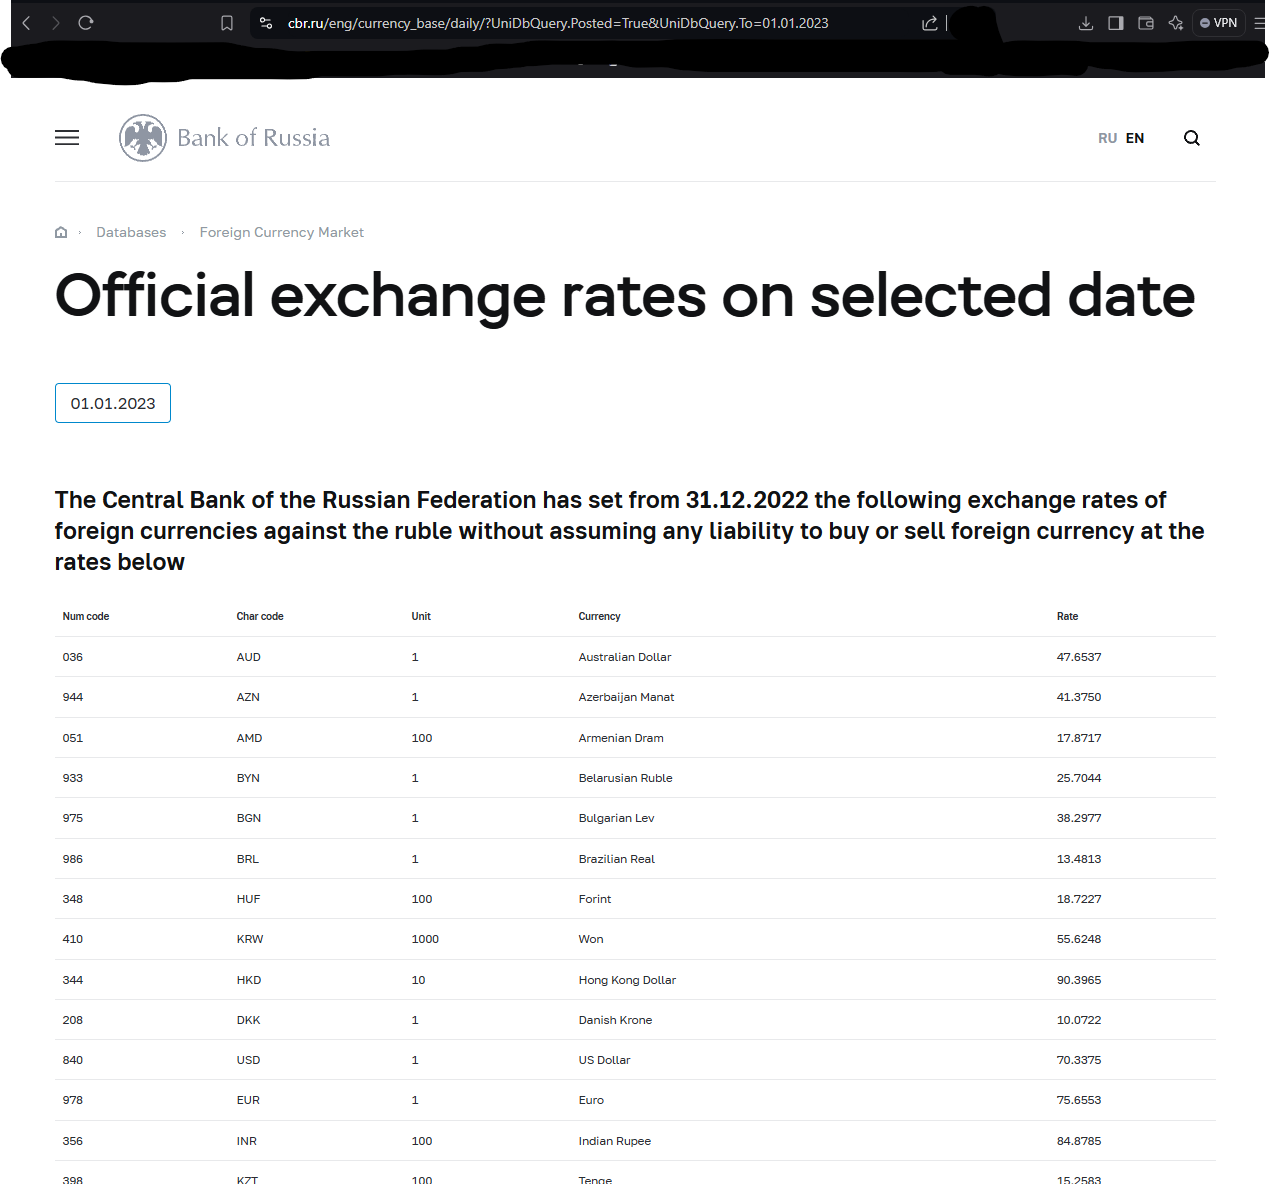

it looks like we can change the url name and get needed data for whatever date we need  
https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=01.01.2023 <- This last part 01.01.2023  

## Generate list of dates for 2023 year

In [9]:
# Let's generate a list of all dates in 2023 using **datetime** Python libriary

import datetime

start_date = datetime.date(2023, 1, 1) # year, month, day
end_date = datetime.date(2023, 12, 31) # year, month, day

date_list = []
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date.strftime("%d.%m.%Y"))
    current_date += datetime.timedelta(days=1)

date_list

['01.01.2023',
 '02.01.2023',
 '03.01.2023',
 '04.01.2023',
 '05.01.2023',
 '06.01.2023',
 '07.01.2023',
 '08.01.2023',
 '09.01.2023',
 '10.01.2023',
 '11.01.2023',
 '12.01.2023',
 '13.01.2023',
 '14.01.2023',
 '15.01.2023',
 '16.01.2023',
 '17.01.2023',
 '18.01.2023',
 '19.01.2023',
 '20.01.2023',
 '21.01.2023',
 '22.01.2023',
 '23.01.2023',
 '24.01.2023',
 '25.01.2023',
 '26.01.2023',
 '27.01.2023',
 '28.01.2023',
 '29.01.2023',
 '30.01.2023',
 '31.01.2023',
 '01.02.2023',
 '02.02.2023',
 '03.02.2023',
 '04.02.2023',
 '05.02.2023',
 '06.02.2023',
 '07.02.2023',
 '08.02.2023',
 '09.02.2023',
 '10.02.2023',
 '11.02.2023',
 '12.02.2023',
 '13.02.2023',
 '14.02.2023',
 '15.02.2023',
 '16.02.2023',
 '17.02.2023',
 '18.02.2023',
 '19.02.2023',
 '20.02.2023',
 '21.02.2023',
 '22.02.2023',
 '23.02.2023',
 '24.02.2023',
 '25.02.2023',
 '26.02.2023',
 '27.02.2023',
 '28.02.2023',
 '01.03.2023',
 '02.03.2023',
 '03.03.2023',
 '04.03.2023',
 '05.03.2023',
 '06.03.2023',
 '07.03.2023',
 '08.03.20

## Generate list of urls to parse

Now let's generate a list containg 365 urls for each day of the 2023 uear

In [7]:
base_url = 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To='

url_list = []

for date in date_list:
    current_date_url = base_url + str(date)
    url_list.append(current_date_url)

url_list

['https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=01.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=02.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=03.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=04.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=05.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=06.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=07.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=08.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=09.01.2023',
 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=10.01.2023',
 'https://www.cbr.ru/eng/currency_base/d

## Parsing the data

In [10]:
# import libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [21]:
# create and test a blueprint for parsing (parse just one url)

test_url = 'https://www.cbr.ru/eng/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=01.01.2023'
response = requests.get(test_url)
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table', {'class': 'data'})
    rows = table.find_all('tr')

    data = []
    for row in rows[1:]:
        cols = row.find_all('td')
        num_code = cols[0].text.strip()
        char_code = cols[1].text.strip()
        unit = cols[2].text.strip()
        currency = cols[3].text.strip()
        rate = cols[4].text.strip()

        data.append({
            'Num code': num_code,
            'Char code': char_code,
            'Unit': unit,
            'Currency': currency,
            'Rate': rate
        })

df = pd.DataFrame(data)
df

,Num code,Char code,Unit,Currency,Rate
0,036,AUD,1,Australian Dollar,47.6537
1,944,AZN,1,Azerbaijan Manat,41.3750
2,051,AMD,100,Armenian Dram,17.8717
3,933,BYN,1,Belarusian Ruble,25.7044
4,975,BGN,1,Bulgarian Lev,38.2977
5,986,BRL,1,Brazilian Real,13.4813
6,348,HUF,100,Forint,18.7227
7,410,KRW,1000,Won,55.6248
8,344,HKD,10,Hong Kong Dollar,90.3965
9,208,DKK,1,Danish Krone,10.0722


In [22]:
from tqdm import tqdm # libriary for get the progress bar of function completion

all_data = []  # list to hold future downloaded data from all URLs

# Iterate over each url in the list and displaying a progress bar
for url in tqdm(url_list, desc="Processing URLs", unit="url"):
    response = requests.get(url) # send a GET request to the current URL
    if response.status_code == 200: # check if the response status is OK (==200)
        html = response.text # get the HTML content of the page
        soup = BeautifulSoup(html, 'html.parser')  # parse the HTML using BeautifulSoup
        table = soup.find('table', {'class': 'data'}) # find the table with the class 'data'
        rows = table.find_all('tr') # get all rows from the table

        # Iterate through each row and extract data from the table
        for row in rows[1:]:  # start with the second row to skip the header
            cols = row.find_all('td') # find all columns in the current row
            if len(cols) < 5:  # check if there are exactly 5 columns
                continue # if no data found -> skip this row

            # Extract data in text format  from each column
            num_code = cols[0].text.strip()
            char_code = cols[1].text.strip()
            unit = cols[2].text.strip()
            currency = cols[3].text.strip()
            rate = cols[4].text.strip()

             # Extract the date from the URL which is the last part of the url (it goeas after '=')
            date = url.split('=')[-1]

            # Create a dictionary with date included
            data_entry = {
                'Date': date,
                'Num code': num_code,
                'Char code': char_code,
                'Unit': unit,
                'Currency': currency,
                'Rate': rate
            }
            
            # Append all_data list with collected data
            all_data.append(data_entry)

# Create a DataFrame from the accumulated data
df = pd.DataFrame(all_data)
df

Processing URLs: 100%|██████████| 365/365 [02:02<00:00,  2.98url/s]


,Date,Num code,Char code,Unit,Currency,Rate
0,01.01.2023,036,AUD,1,Australian Dollar,47.6537
1,01.01.2023,944,AZN,1,Azerbaijan Manat,41.3750
2,01.01.2023,051,AMD,100,Armenian Dram,17.8717
3,01.01.2023,933,BYN,1,Belarusian Ruble,25.7044
4,01.01.2023,975,BGN,1,Bulgarian Lev,38.2977
...,...,...,...,...,...,...
15528,31.12.2023,203,CZK,10,Czech Koruna,40.3293
15529,31.12.2023,752,SEK,10,Swedish Krona,90.3042
15530,31.12.2023,756,CHF,1,Swiss Franc,106.7591
15531,31.12.2023,710,ZAR,10,Rand,48.2647


## data processing

All our data is in text format now so wee need to change it to needed types

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y') # Convert the 'Date' column to datetime format
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce') # Convert the 'Rate' column to numeric format (if any errors -> replace with NaN)
df['Unit'] = pd.to_numeric(df['Unit'], errors='coerce') # Convert the 'Unit' column to numeric format (if any errors -> replace with NaN)
df['Num code'] = pd.to_numeric(df['Num code'], errors='coerce') # Convert the 'Num code' column to numeric format (if any errors -> replace with NaN)

In [26]:
df.isna().sum()

Date         0
Num code     0
Char code    0
Unit         0
Currency     0
Rate         0
dtype: int64

Good, there is no nulls in our data so now errors at this stage

Now wee need to remove and add needed columns for the task purposes

In [30]:
# Create new columns based on the 'Date' column
df['Start of Month'] = df['Date'].dt.to_period('M').dt.start_time  # Start of the month
df['Year'] = df['Date'].dt.year  # year
df['Quarter'] = df['Date'].dt.quarter  # quarter
df['Month'] = df['Date'].dt.month  # month
df['Week of Year'] = df['Date'].dt.strftime('%U').astype(int)  # week of the year

df

,Date,Num code,Char code,Unit,Currency,Rate,Start of Month,Year,Quarter,Month,Week of Year
0,2023-01-01,36,AUD,1,Australian Dollar,47.6537,2023-01-01,2023,1,1,1
1,2023-01-01,944,AZN,1,Azerbaijan Manat,41.3750,2023-01-01,2023,1,1,1
2,2023-01-01,51,AMD,100,Armenian Dram,17.8717,2023-01-01,2023,1,1,1
3,2023-01-01,933,BYN,1,Belarusian Ruble,25.7044,2023-01-01,2023,1,1,1
4,2023-01-01,975,BGN,1,Bulgarian Lev,38.2977,2023-01-01,2023,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15528,2023-12-31,203,CZK,10,Czech Koruna,40.3293,2023-12-01,2023,4,12,53
15529,2023-12-31,752,SEK,10,Swedish Krona,90.3042,2023-12-01,2023,4,12,53
15530,2023-12-31,756,CHF,1,Swiss Franc,106.7591,2023-12-01,2023,4,12,53
15531,2023-12-31,710,ZAR,10,Rand,48.2647,2023-12-01,2023,4,12,53


In [35]:
# Let's create a new df with only needed for our task columns
all_curr_df = df[['Date', 'Start of Month', 'Year', 'Quarter', 'Month', 'Week of Year', 'Currency', 'Char code', 'Unit', 'Rate']]
all_curr_df['Rate Value'] = all_curr_df['Rate'] / all_curr_df['Unit'] # real exchange rate -> how many roubles would it cost to buy 1 needed currency
all_curr_df

,Date,Start of Month,Year,Quarter,Month,Week of Year,Currency,Char code,Unit,Rate,Rate Value
0,2023-01-01,2023-01-01,2023,1,1,1,Australian Dollar,AUD,1,47.6537,47.653700
1,2023-01-01,2023-01-01,2023,1,1,1,Azerbaijan Manat,AZN,1,41.3750,41.375000
2,2023-01-01,2023-01-01,2023,1,1,1,Armenian Dram,AMD,100,17.8717,0.178717
3,2023-01-01,2023-01-01,2023,1,1,1,Belarusian Ruble,BYN,1,25.7044,25.704400
4,2023-01-01,2023-01-01,2023,1,1,1,Bulgarian Lev,BGN,1,38.2977,38.297700
...,...,...,...,...,...,...,...,...,...,...,...
15528,2023-12-31,2023-12-01,2023,4,12,53,Czech Koruna,CZK,10,40.3293,4.032930
15529,2023-12-31,2023-12-01,2023,4,12,53,Swedish Krona,SEK,10,90.3042,9.030420
15530,2023-12-31,2023-12-01,2023,4,12,53,Swiss Franc,CHF,1,106.7591,106.759100
15531,2023-12-31,2023-12-01,2023,4,12,53,Rand,ZAR,10,48.2647,4.826470


For task purposes we need to filter our data to only have currencies -> USD, EUR, CNY

In [41]:
selected_currencies = ['USD', 'EUR', 'CNY']
filtered_curr_df = all_curr_df[all_curr_df['Char code'].isin(selected_currencies)]
filtered_curr_df

,Date,Start of Month,Year,Quarter,Month,Week of Year,Currency,Char code,Unit,Rate,Rate Value
10,2023-01-01,2023-01-01,2023,1,1,1,US Dollar,USD,1,70.3375,70.33750
11,2023-01-01,2023-01-01,2023,1,1,1,Euro,EUR,1,75.6553,75.65530
16,2023-01-01,2023-01-01,2023,1,1,1,Yuan Renminbi,CNY,10,98.9492,9.89492
44,2023-01-02,2023-01-01,2023,1,1,1,US Dollar,USD,1,70.3375,70.33750
45,2023-01-02,2023-01-01,2023,1,1,1,Euro,EUR,1,75.6553,75.65530
...,...,...,...,...,...,...,...,...,...,...,...
15461,2023-12-30,2023-12-01,2023,4,12,52,Euro,EUR,1,99.1919,99.19190
15469,2023-12-30,2023-12-01,2023,4,12,52,Yuan Renminbi,CNY,1,12.5762,12.57620
15503,2023-12-31,2023-12-01,2023,4,12,53,US Dollar,USD,1,89.6883,89.68830
15504,2023-12-31,2023-12-01,2023,4,12,53,Euro,EUR,1,99.1919,99.19190


In [43]:
unique_char_codes = filtered_curr_df['Char code'].unique()
print(f"unique currencies in filtered dataframe ->{unique_char_codes}")

unique currencies in filtered dataframe ->['USD' 'EUR' 'CNY']


## Optional (save dataframe to excel file)

In [45]:
filtered_curr_df.to_excel('USD EUR CNY exhcange rate for 2023 year (from cbr.ru wedsite).xlsx', index=False)